# Author: Devank Kaushik

In [385]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [387]:
df = pd.read_parquet('/Users/devankk/Desktop/taxi_WeatherData.parquet')

In [389]:
df['day'] = df['pickup_dateTime'].dt.day
df['month'] = df['pickup_dateTime'].dt.month
df['hour'] = df['pickup_dateTime'].dt.hour

In [391]:
X = df[['day','month','hour','trip_duration (mins)' , 'PULocationID', 'DOLocationID', 'pickup_temperature (°C)', 'trip_distance', 'tolls_amount','pickup_precipitation (mm)','pickup_rain (mm)','speed (miles/hr)','fare per mile']]
y = df['total_amount']

# Linear Regression

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [395]:
y_pred = model.predict(X_test)

In [397]:
MAE_LR= round(mean_absolute_error(y_test, y_pred),4)
RMSE_LR = round(root_mean_squared_error(y_test, y_pred),4)
print(f"The Mean Absolute Error is {MAE_LR} and the Root Mean Square Error is {RMSE_LR}")

The Mean Absolute Error is 10.1289 and the Root Mean Square Error is 15.6065


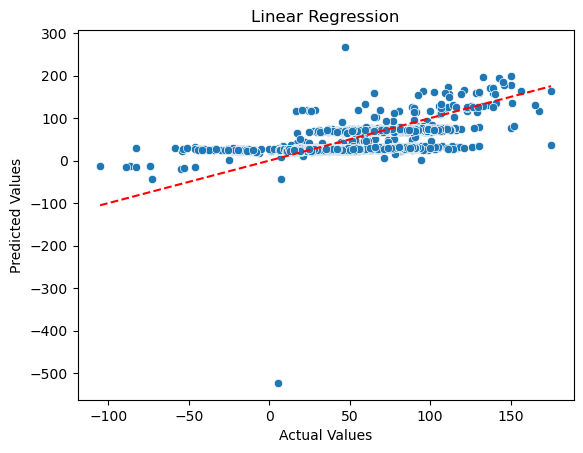

In [399]:
test_residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Ridge Cross Validation

In [401]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [403]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0, 100.0, 1000.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0, 100.0, 1000.0),
        scoring='neg_mean_absolute_error')

In [405]:
ridge_cv_model.alpha_

1000.0

In [423]:
ridge_cv_model.coef_

array([ 0.09220794,  0.25530299,  0.57307298,  3.0761989 , -0.93688833,
       -0.76509695,  0.1786472 ,  6.23593273, 14.56906103,  0.34008565,
       -0.40361059, -5.81808145,  1.73894332])

In [407]:
y_pred_ridge = ridge_cv_model.predict(X_test)
MAE_Ridge= round(mean_absolute_error(y_test, y_pred_ridge),4)
RMSE_Ridge = round(root_mean_squared_error(y_test, y_pred_ridge),4)
print(f"The Mean Absolute Error is {MAE_Ridge} and the Root Mean Square Error is {RMSE_Ridge}")

The Mean Absolute Error is 10.2822 and the Root Mean Square Error is 15.2813


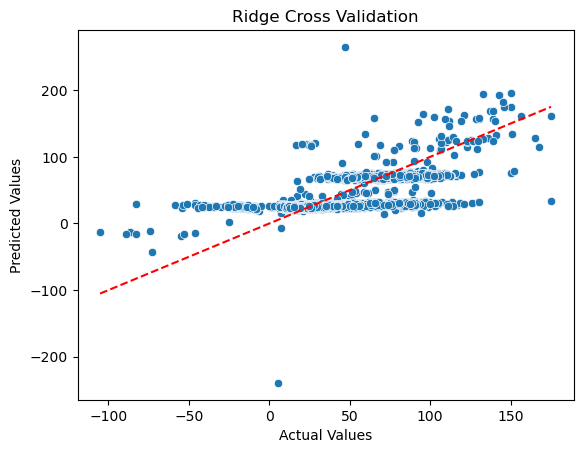

In [409]:
test_residuals = y_test - y_pred_ridge
sns.scatterplot(x = y_test, y = y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Ridge Cross Validation")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Lasso Cross Validation 

In [411]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [413]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(eps=0.05, n_alphas=10000, cv=10, random_state=101) 
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, eps=0.05, n_alphas=10000, random_state=101)

In [415]:
lasso_cv_model.alpha_

0.7824003952319349

In [421]:
lasso_cv_model.coef_

array([ 0.        ,  0.        ,  0.        ,  2.51330917, -0.24399394,
       -0.07236798,  0.        ,  0.        , 14.52369973, -0.        ,
       -0.        ,  0.        ,  0.98910719])

In [417]:
y_pred_lasso = lasso_cv_model.predict(X_test)
MAE_Lasso= round(mean_absolute_error(y_test, y_pred_lasso),4)
RMSE_Lasso = round(root_mean_squared_error(y_test, y_pred_lasso),4)
print(f"The Mean Absolute Error is {MAE_Lasso} and the Root Mean Square Error is {RMSE_Lasso}") 

The Mean Absolute Error is 10.5815 and the Root Mean Square Error is 15.4593


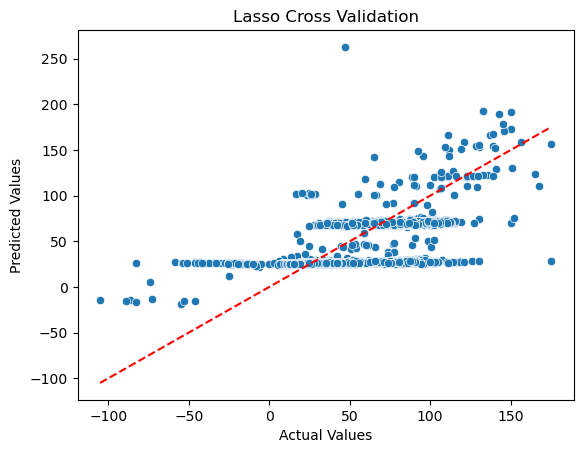

In [419]:
test_residuals = y_test - y_pred_lasso
sns.scatterplot(x = y_test, y = y_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Lasso Cross Validation")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Random Forest Regressor

In [425]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 101)

In [427]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [429]:
y_pred_rfr = rfr.predict(X_test)
MAE_rfr= round(mean_absolute_error(y_test, y_pred_rfr),4)
RMSE_rfr = round(root_mean_squared_error(y_test, y_pred_rfr),4)
print(f"The Mean Absolute Error is {MAE_rfr} and the Root Mean Square Error is {RMSE_rfr}")

The Mean Absolute Error is 0.3669 and the Root Mean Square Error is 1.6936


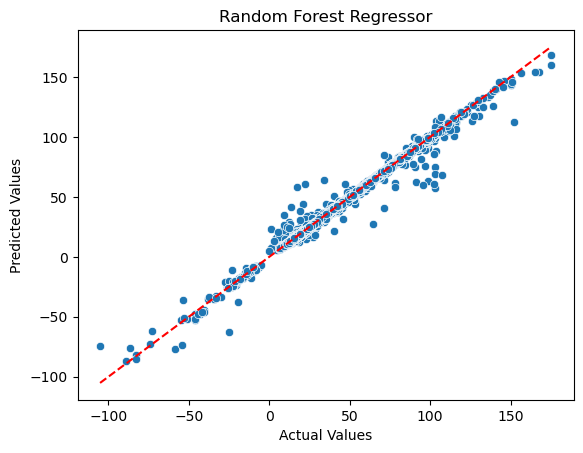

In [431]:
sns.scatterplot(x = y_test, y = y_pred_rfr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Random Forest Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

| Sno. | Model Used | Mean Absolute Error | Root Mean Squared Error |
| :- | -: | :-: | :-: |
| 1. | Linear Regression | 10.1289 | 15.6065
| 2. | Ridge Cross Validation | 10.2822 | 15.2813 
| 3. | Lasso Cross Validation | 10.5815 | 15.4593
| 4. | Random Forest Regressor | 0.3669 | 1.6936